<a href="https://colab.research.google.com/github/kushal-arya/Deep-Learning-Projects/blob/main/deeplearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
# Load the diabetes dataset
diabetes_data = load_diabetes()
X, y = diabetes_data.data, diabetes_data.target

In [ ]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data=X, columns=diabetes_data.feature_names)
df['progression'] = y  # Adding the target variable to the DataFrame



In [ ]:
df.shape

(442, 11)

In [ ]:
df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
df.describe(include='all')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [ ]:
# Look for missing, null, NaN records
missing_values = df.isnull().sum()

# Output for missing values and outliers
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
progression    0
dtype: int64


In [ ]:

# List all unique data types in the dataset
unique_data_types = df.dtypes.unique()

print("Data Types in the Dataset:")
for dtype in unique_data_types:
    print(dtype)

# Columns for each data type
for dtype in unique_data_types:
    print(f"\nColumns with Data Type {dtype}:")
    print(df.select_dtypes(include=[dtype]).columns.tolist())

Data Types in the Dataset:
float64

Columns with Data Type float64:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'progression']


In [ ]:
# Find outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


print("\nNumber of outliers in each column:")
print(outliers)




Number of outliers in each column:
age            0
sex            0
bmi            3
bp             0
s1             8
s2             7
s3             7
s4             2
s5             4
s6             9
progression    0
dtype: int64


## EDA

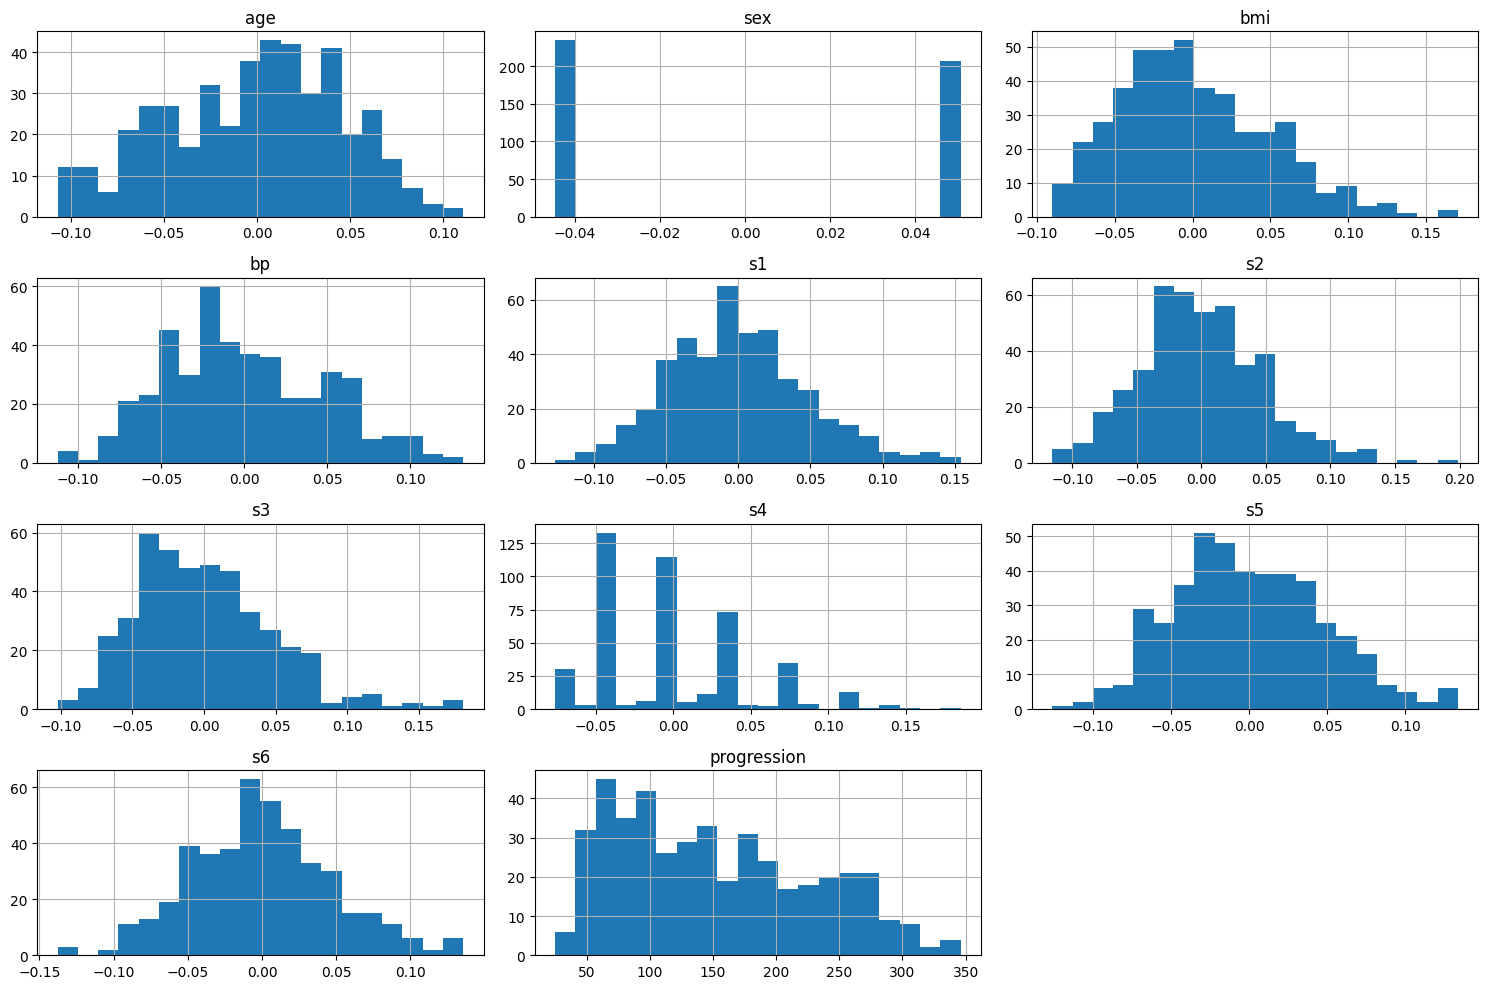

In [ ]:
# Plot distributions for numerical features
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

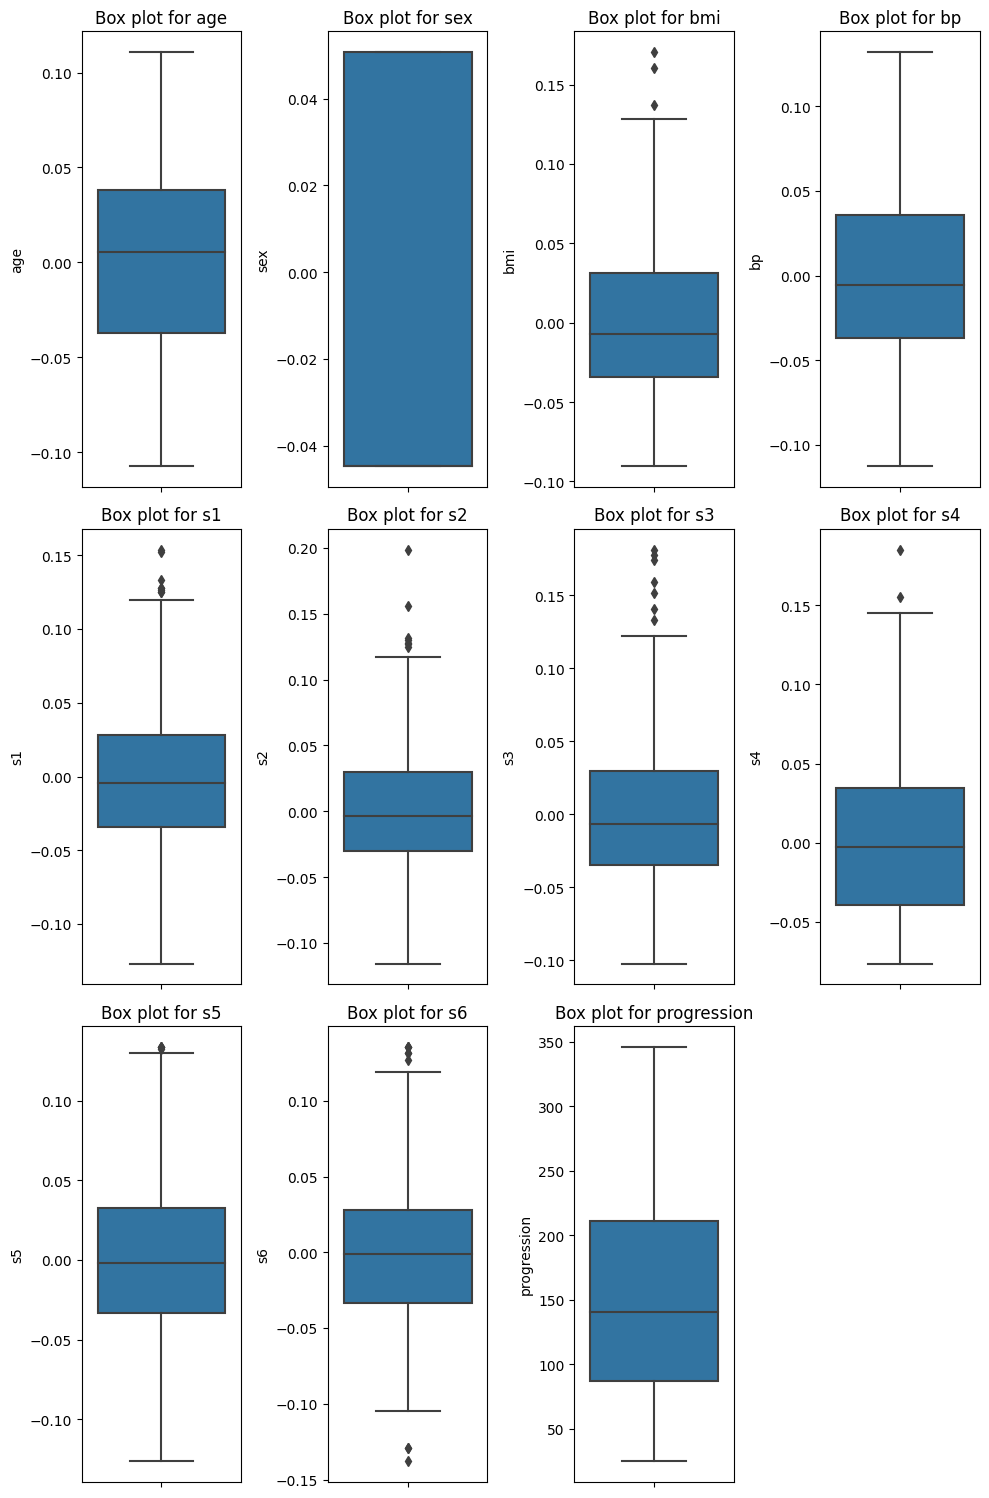

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample columns for which we'll plot the box plots
cols_to_plot = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'progression']

# Setting up the figure and axes
plt.figure(figsize=(10, 20))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(4, 4, i)  # Adjusted to 4 rows, 3 columns
    sns.boxplot(y=df[col])
    plt.title(f'Box plot for {col}')
    plt.ylabel(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()


# Correlation Matrix

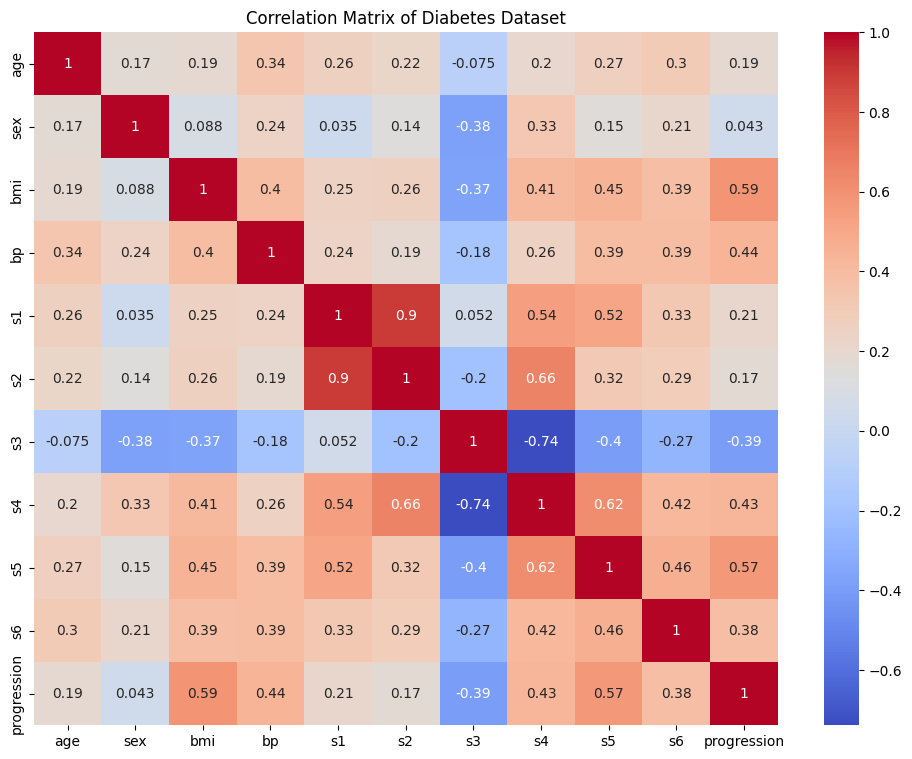

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(12, 9))
plt.title('Correlation Matrix of Diabetes Dataset')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Feature Importance

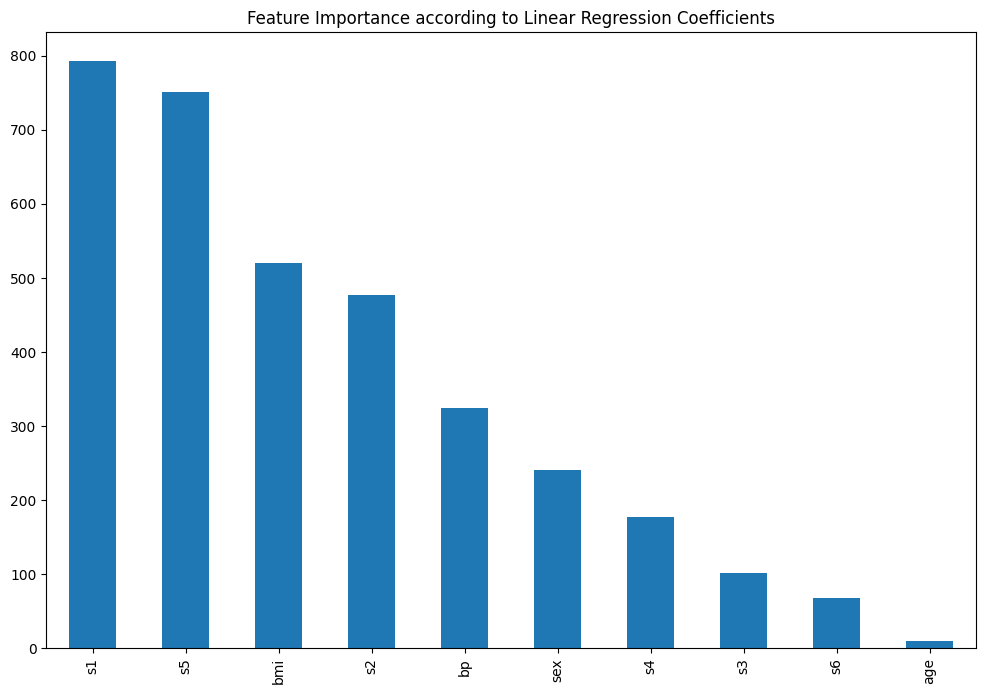

In [ ]:
# Feature importance using a simple linear model for EDA
from sklearn.linear_model import LinearRegression

# Fit the model
model = LinearRegression()
model.fit(df.drop('progression', axis=1), df['progression'])

# Get the feature importance by getting the absolute values of the coefficients
feature_importance = pd.Series(np.abs(model.coef_), index=diabetes_data.feature_names).sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance according to Linear Regression Coefficients')
plt.show()

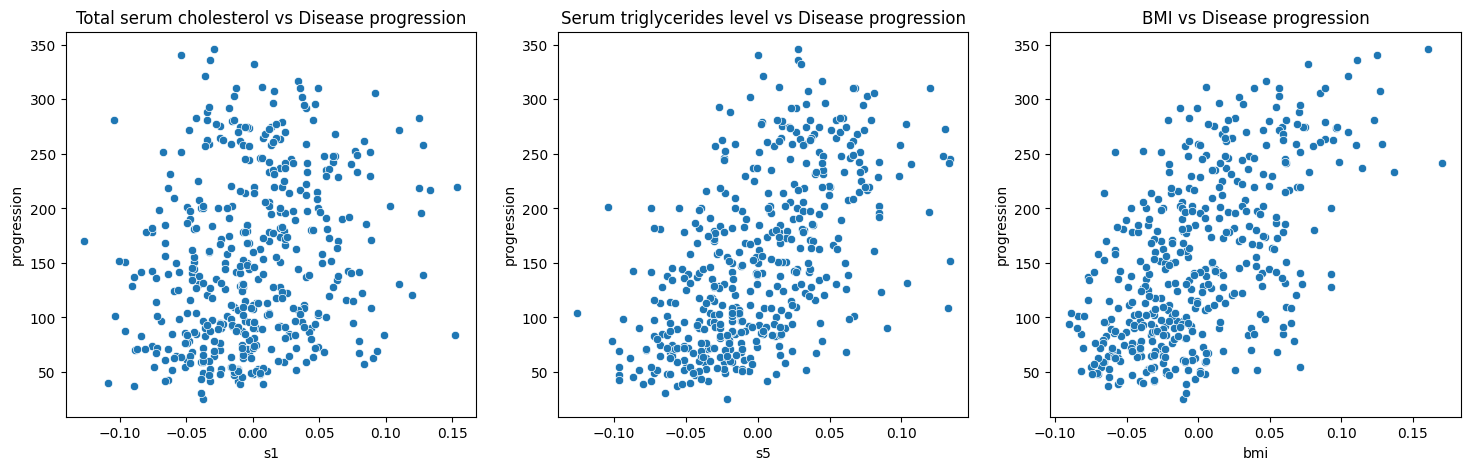

In [ ]:
# Since the most important features according to the linear model are 's1', 's5', and 'bmi',
# we will focus our plots on these features.

# Scatter plots of these features against the progression to show the relationship
plt.figure(figsize=(18, 5))

# Scatter plot for 's1' vs 'progression'
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['s1'], y=df['progression'])
plt.title('Total serum cholesterol vs Disease progression')

# Scatter plot for 's5' vs 'progression'
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['s5'], y=df['progression'])
plt.title('Serum triglycerides level vs Disease progression')

# Scatter plot for 'bmi' vs 'progression'
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['bmi'], y=df['progression'])
plt.title('BMI vs Disease progression')

plt.show()




'Total serum cholesterol vs Disease progression': This plot suggests a relationship between serum cholesterol levels and disease progression.
'Serum triglycerides level vs Disease progression': This plot shows how serum triglycerides level may be related to the progression of diabetes.
'BMI vs Disease progression': The plot indicates that body mass index has a potential correlation with disease progression.

# Train the model

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.tensorboard import SummaryWriter

# Assuming 'df' is a pandas DataFrame containing the data including the 'progression' column
# Remove outliers using z-score
z_scores = np.abs(stats.zscore(df))
filtered_entries = (z_scores < 3).all(axis=1)
df_no_outliers = df[filtered_entries]

In [ ]:
# Features and target
X_no_outliers = df_no_outliers.drop('progression', axis=1).values
y_no_outliers = df_no_outliers['progression'].values.reshape(-1, 1)

# Scaling features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_no_outliers)
y_scaled = scaler.fit_transform(y_no_outliers)

In [ ]:
# Convert the data to tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

In [ ]:
# Split the dataset into training and validation datasets (80%/20%)
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the datasets for dataloaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

In [ ]:
# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Define the model classes
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.model(x)

In [ ]:

# Function to train the model and return the losses
def train_model(model, optimizer, criterion, train_loader, val_loader, epochs, writer):
    model.train()
    training_losses = []
    validation_losses = []

    for epoch in range(epochs):
        epoch_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item() * inputs.size(0)

        training_loss = epoch_loss / len(train_loader.dataset)
        training_losses.append(training_loss)

        # Log the training loss for each epoch using TensorBoard
        writer.add_scalar('Training Loss', training_loss, epoch)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)

        validation_loss = val_loss / len(val_loader.dataset)
        validation_losses.append(validation_loss)

        # Log the validation loss for each epoch using TensorBoard
        writer.add_scalar('Validation Loss', validation_loss, epoch)

        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {training_loss:.4f}, Validation Loss: {validation_loss:.4f}')

    return training_losses, validation_losses

In [ ]:

# Define learning rates to test
learning_rates = [0.001, 0.01, 0.1]



In [ ]:
# Train and collect final validation losses for each model at each learning rate
loss_functions = {'MSE': nn.MSELoss(), 'MAE': nn.L1Loss()}
training_results = {}
# Prepare to collect losses for each model and learning rate
model_classes = [MLP, LinearRegressionModel, DNN]
model_names = ['MLP', 'LinearRegression', 'DNN']
training_losses_dict = {model_name: {lr: [] for lr in learning_rates} for model_name in model_names}
validation_losses_dict = {model_name: {lr: [] for lr in learning_rates} for model_name in model_names}
training_results = {loss_name: {model_name: {lr: [] for lr in learning_rates} for model_name in model_names} for loss_name in loss_functions.keys()}

# using SGD Optimizer

Training MLP with MSE loss and learning rate: 0.001
Epoch 1/100, Training Loss: 0.2155, Validation Loss: 0.2002
Epoch 2/100, Training Loss: 0.2059, Validation Loss: 0.1909
Epoch 3/100, Training Loss: 0.1969, Validation Loss: 0.1821
Epoch 4/100, Training Loss: 0.1883, Validation Loss: 0.1737
Epoch 5/100, Training Loss: 0.1803, Validation Loss: 0.1659
Epoch 6/100, Training Loss: 0.1727, Validation Loss: 0.1585
Epoch 7/100, Training Loss: 0.1656, Validation Loss: 0.1516
Epoch 8/100, Training Loss: 0.1589, Validation Loss: 0.1451
Epoch 9/100, Training Loss: 0.1526, Validation Loss: 0.1389
Epoch 10/100, Training Loss: 0.1467, Validation Loss: 0.1332
Epoch 11/100, Training Loss: 0.1412, Validation Loss: 0.1278
Epoch 12/100, Training Loss: 0.1360, Validation Loss: 0.1227
Epoch 13/100, Training Loss: 0.1310, Validation Loss: 0.1178
Epoch 14/100, Training Loss: 0.1264, Validation Loss: 0.1133
Epoch 15/100, Training Loss: 0.1221, Validation Loss: 0.1091
Epoch 16/100, Training Loss: 0.1180, Valid

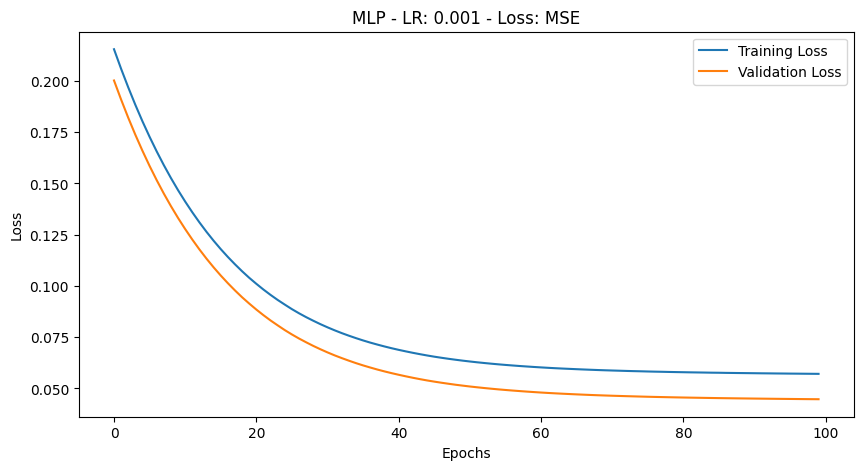

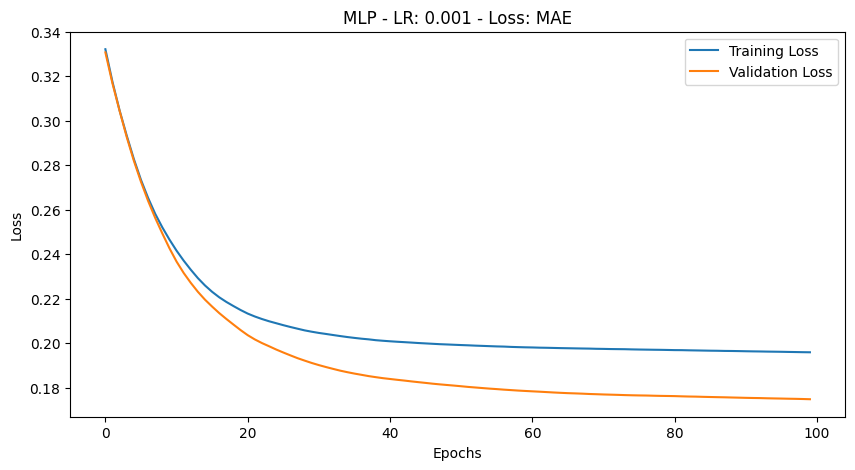

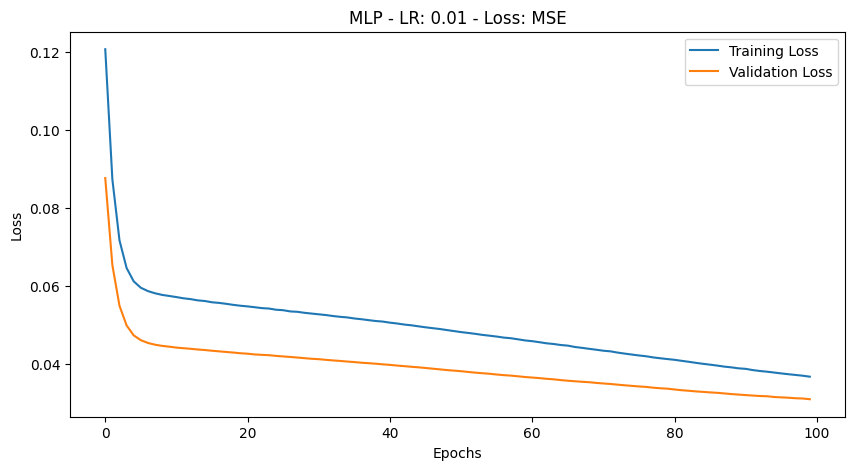

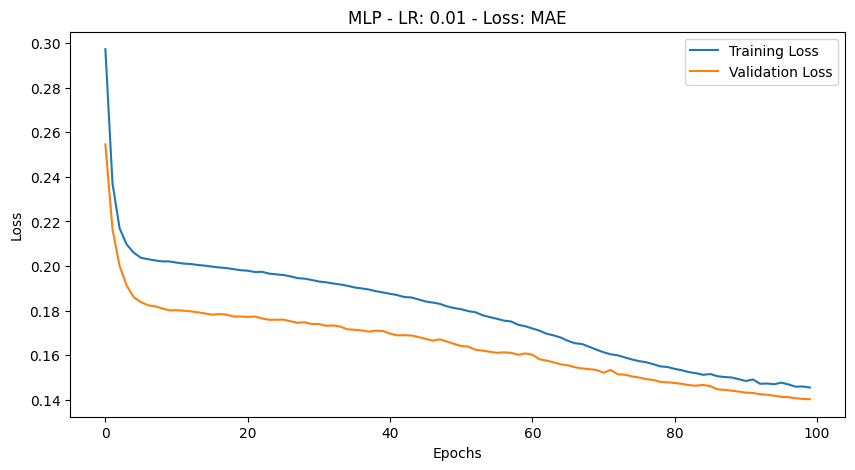

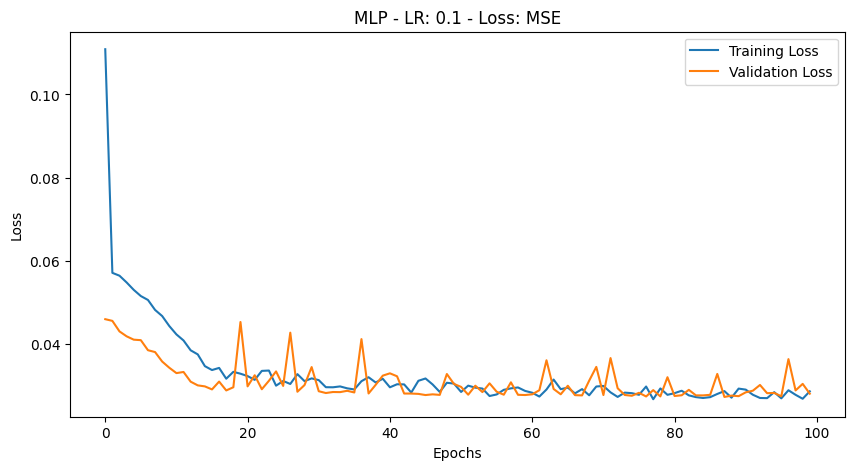

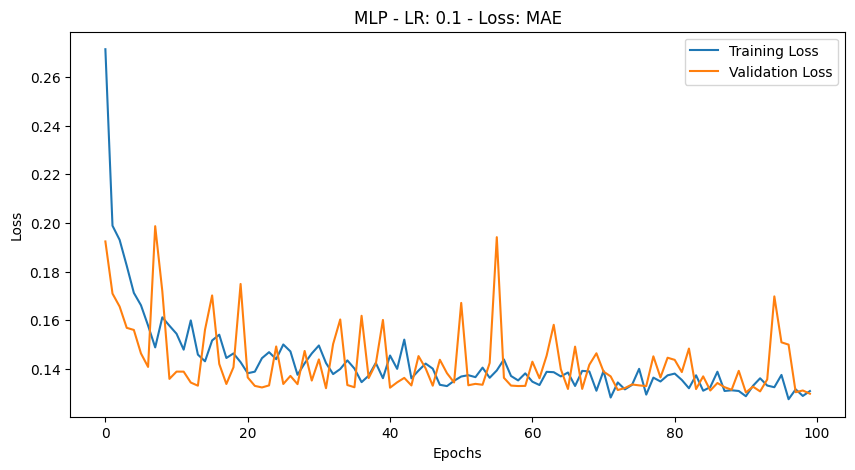

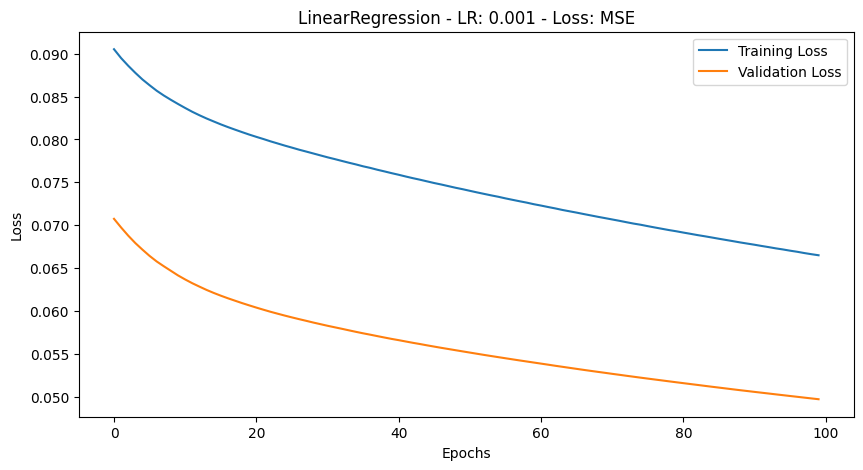

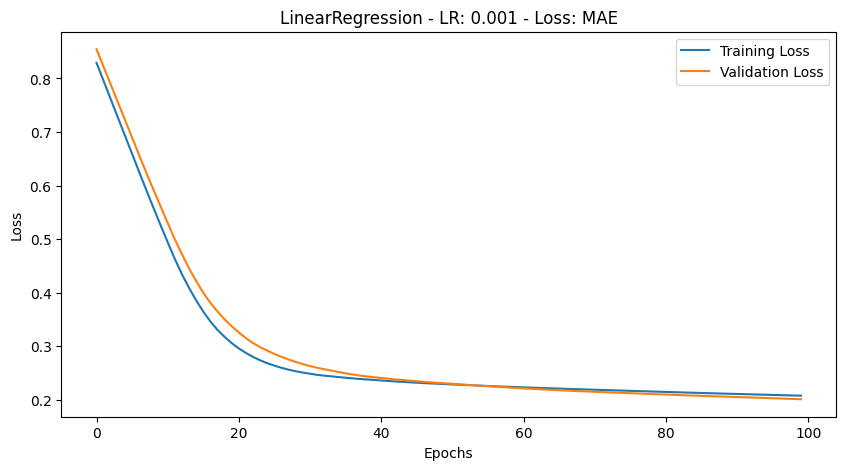

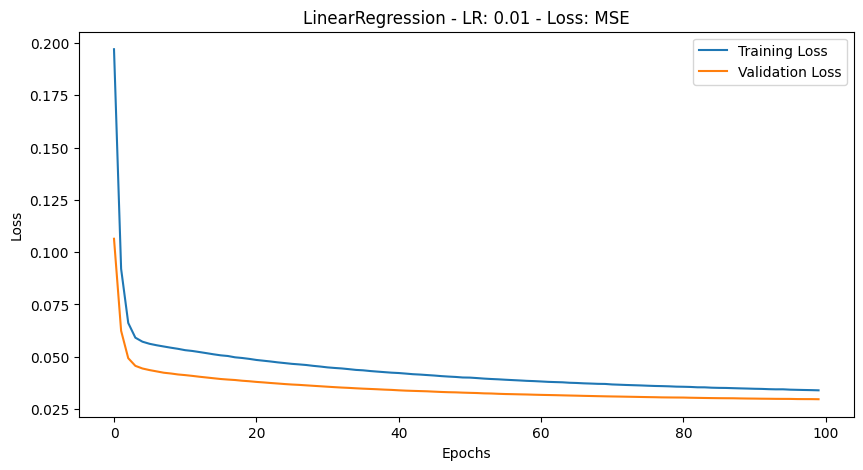

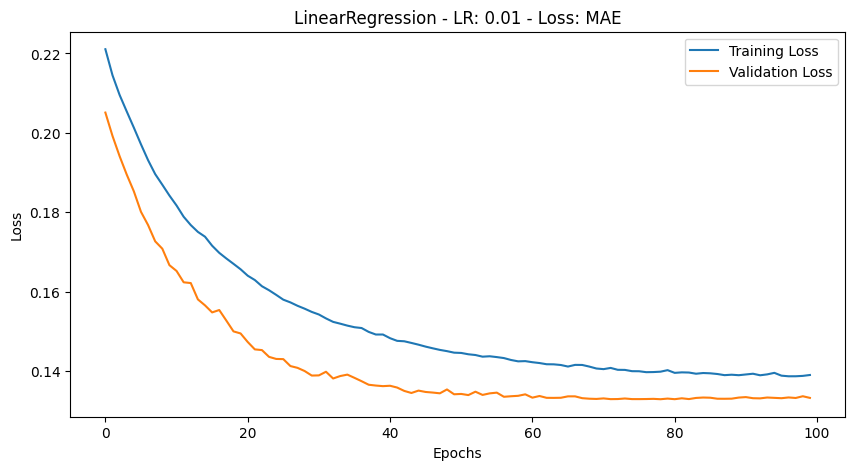

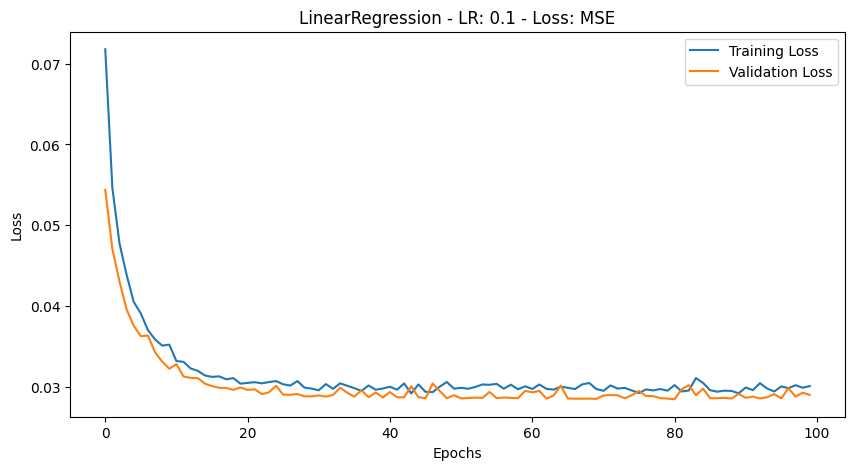

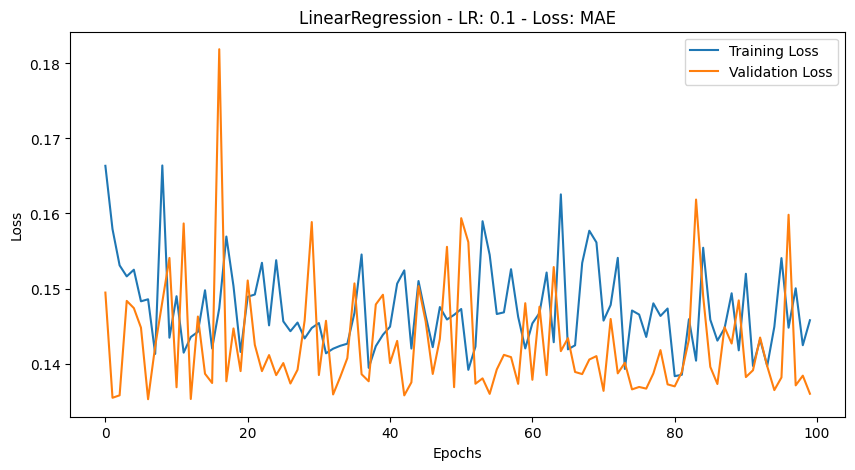

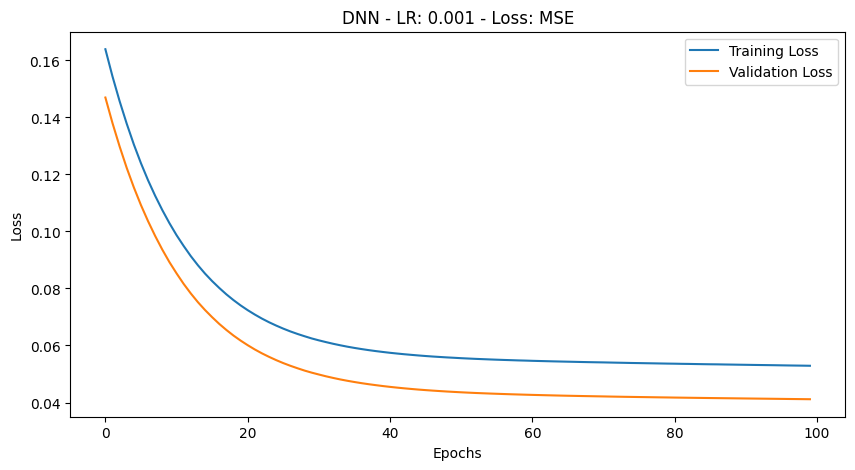

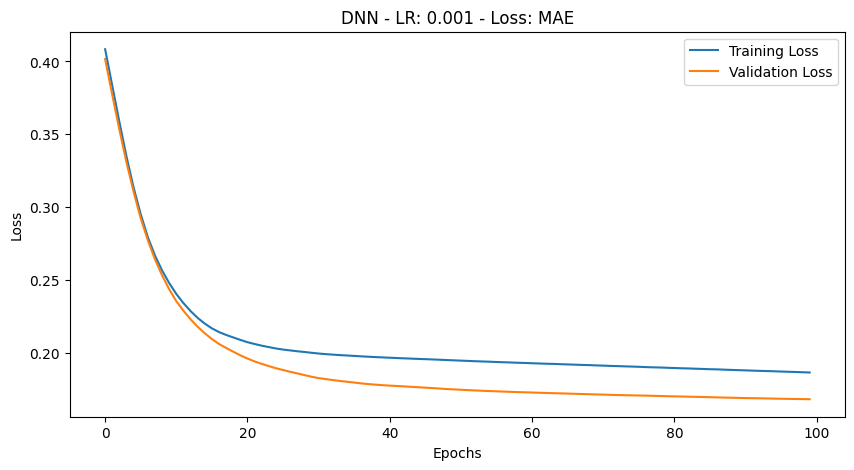

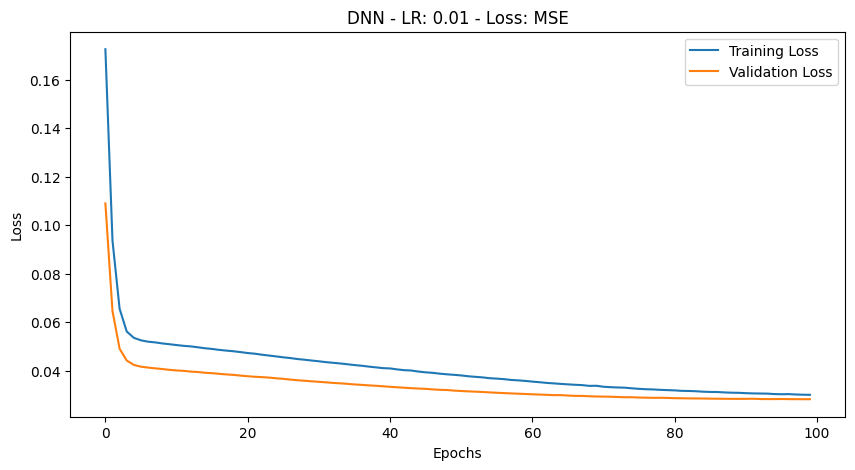

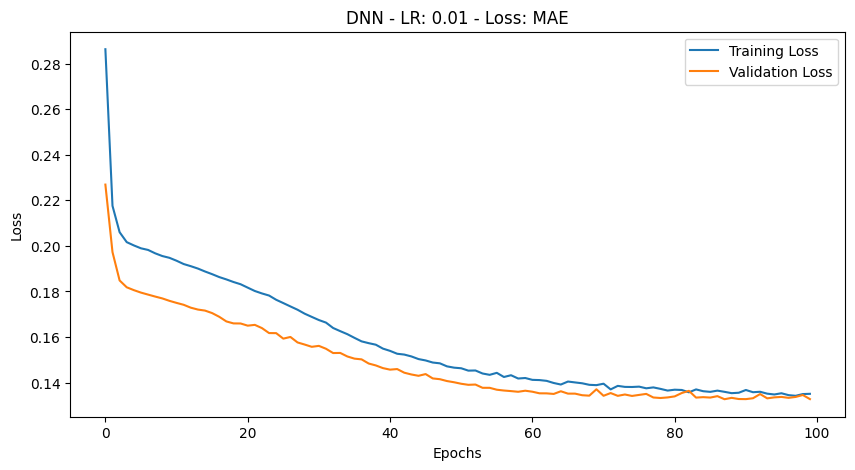

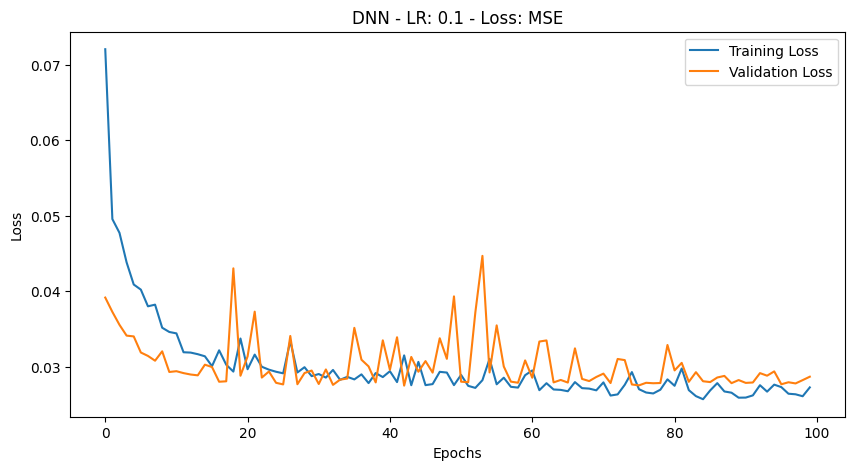

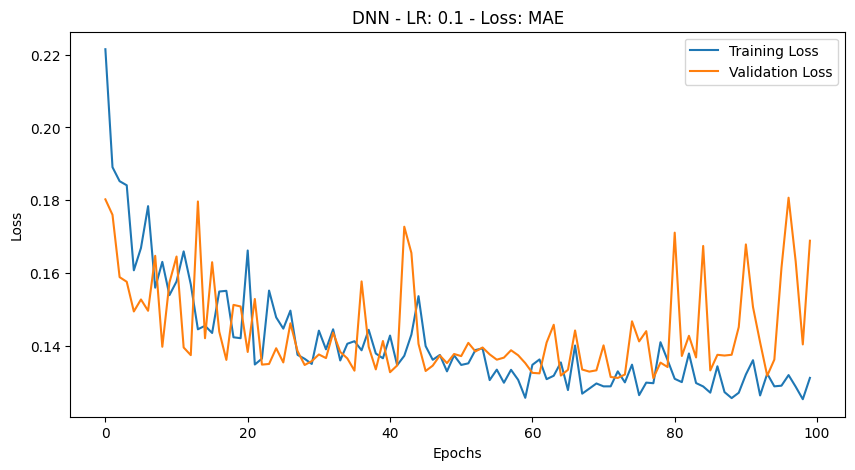

The best model is MLP with learning rate: 0.1, loss function: MSE, and validation loss: 0.0280


In [ ]:

# Train and collect final validation losses for each model at each learning rate
loss_functions = {'MSE': nn.MSELoss(), 'MAE': nn.L1Loss()}
training_results = {}

for loss_name, loss_function in loss_functions.items():
    for model_class, model_name in zip(model_classes, model_names):
        for lr in learning_rates:
            writer = SummaryWriter(comment=f'_{model_name}_{loss_name}_{lr}')
            print(f"Training {model_name} with {loss_name} loss and learning rate: {lr}")
            model = model_class(input_dim=X_train.shape[1]).to(device)
            optimizer = torch.optim.SGD(model.parameters(), lr=lr)

            training_losses, validation_losses = train_model(model, optimizer, loss_function, train_loader, val_loader, 100, writer)

            if model_name not in training_results:
                training_results[model_name] = {}
            if lr not in training_results[model_name]:
                training_results[model_name][lr] = {}
            training_results[model_name][lr][loss_name] = {
                'train_loss': training_losses,
                'val_loss': validation_losses
            }

            writer.close()

def plot_losses(training_results, model_names, learning_rates, loss_functions):
    for model_name in model_names:
        for lr in learning_rates:
            for loss_name in loss_functions.keys():
                plt.figure(figsize=(10, 5))
                data = training_results[model_name][lr][loss_name]
                plt.plot(data['train_loss'], label='Training Loss')
                plt.plot(data['val_loss'], label='Validation Loss')
                plt.title(f'{model_name} - LR: {lr} - Loss: {loss_name}')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.show()

# Call plot_losses after the training loop
plot_losses(training_results, model_names, learning_rates, loss_functions)



best_model_name = None
best_lr = None
best_loss_name = None
lowest_loss = float('inf')

for model_name in model_names:
    for lr in learning_rates:
        for loss_name in loss_functions.keys():
            # Check if the key exists in the dictionary
            if loss_name in training_results[model_name][lr]:
                val_loss = training_results[model_name][lr][loss_name]['val_loss'][-1]
                if val_loss < lowest_loss:
                    lowest_loss = val_loss
                    best_model_name = model_name
                    best_lr = lr
                    best_loss_name = loss_name

print(f"The best model is {best_model_name} with learning rate: {best_lr}, loss function: {best_loss_name}, and validation loss: {lowest_loss:.4f}")




# using ADAM Optimizer


Training MLP with MSE loss and learning rate: 0.001
Epoch 1/100, Training Loss: 0.0696, Validation Loss: 0.0416
Epoch 2/100, Training Loss: 0.0542, Validation Loss: 0.0381
Epoch 3/100, Training Loss: 0.0479, Validation Loss: 0.0347
Epoch 4/100, Training Loss: 0.0404, Validation Loss: 0.0309
Epoch 5/100, Training Loss: 0.0356, Validation Loss: 0.0297
Epoch 6/100, Training Loss: 0.0328, Validation Loss: 0.0300
Epoch 7/100, Training Loss: 0.0311, Validation Loss: 0.0290
Epoch 8/100, Training Loss: 0.0298, Validation Loss: 0.0285
Epoch 9/100, Training Loss: 0.0293, Validation Loss: 0.0282
Epoch 10/100, Training Loss: 0.0281, Validation Loss: 0.0281
Epoch 11/100, Training Loss: 0.0278, Validation Loss: 0.0291
Epoch 12/100, Training Loss: 0.0281, Validation Loss: 0.0292
Epoch 13/100, Training Loss: 0.0277, Validation Loss: 0.0287
Epoch 14/100, Training Loss: 0.0275, Validation Loss: 0.0287
Epoch 15/100, Training Loss: 0.0276, Validation Loss: 0.0283
Epoch 16/100, Training Loss: 0.0281, Valid

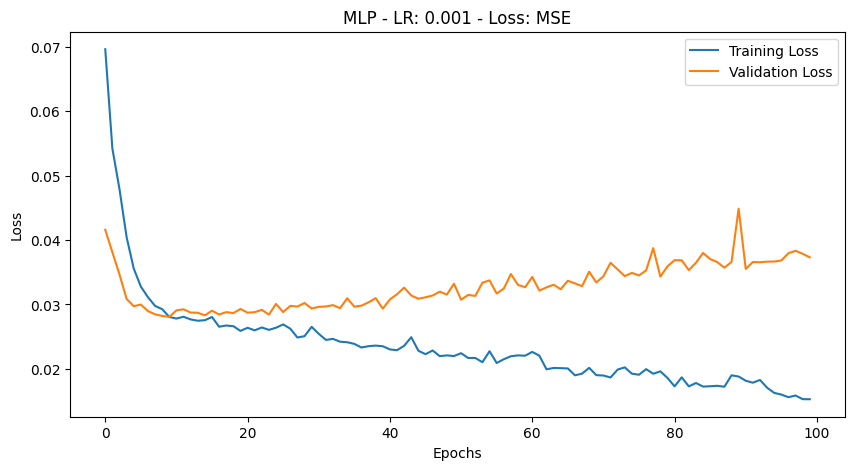

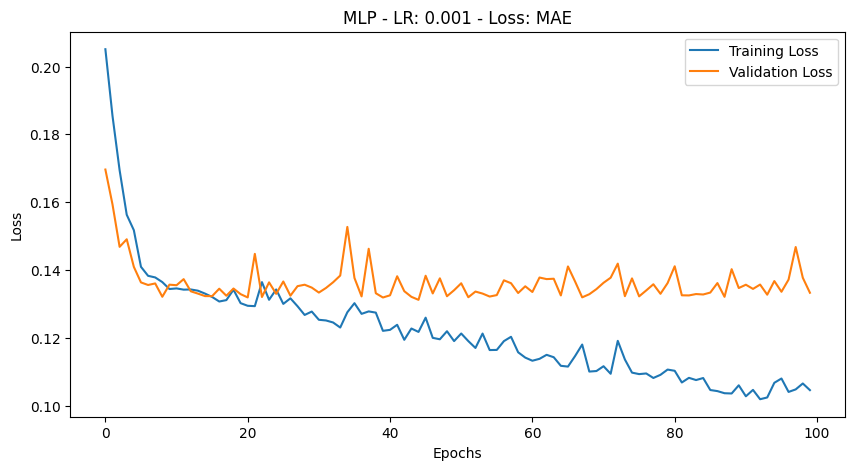

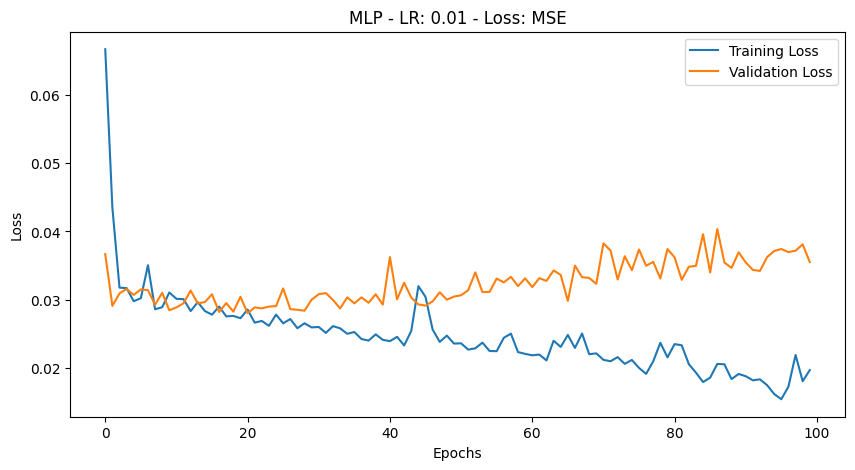

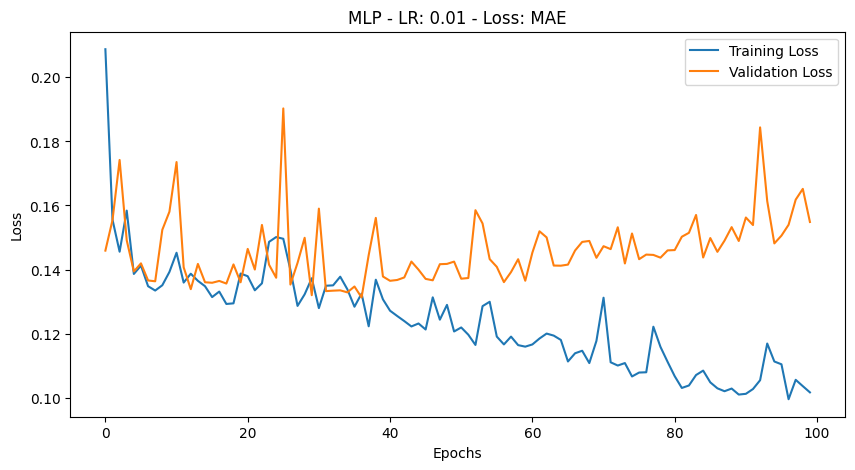

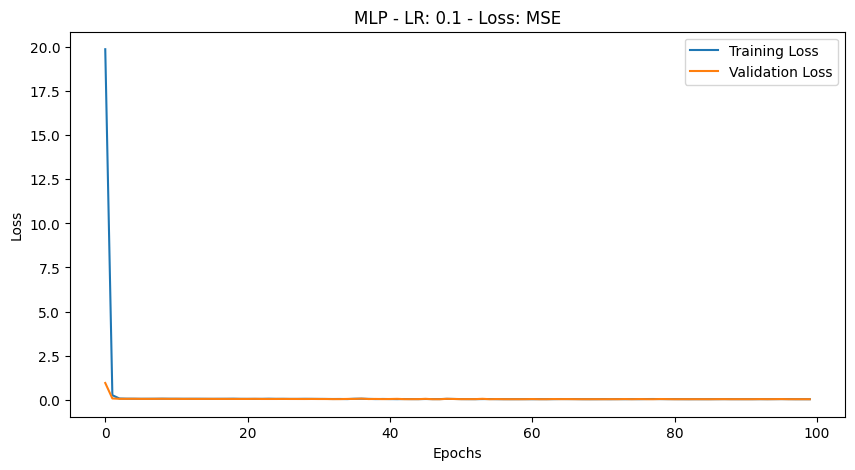

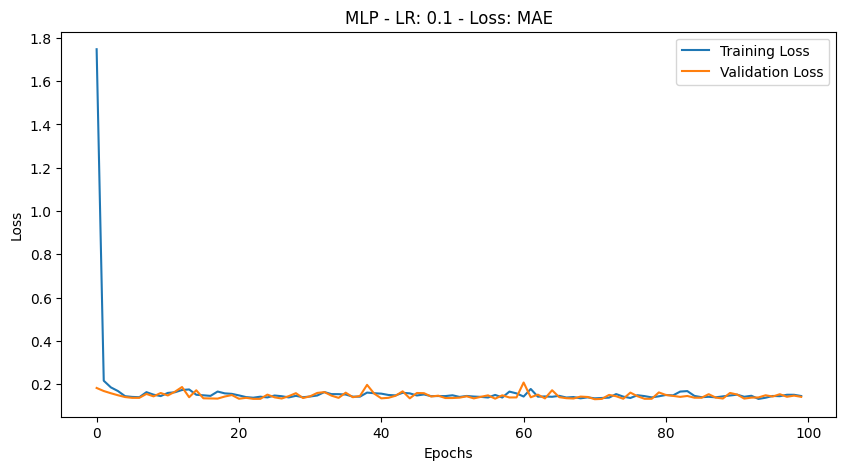

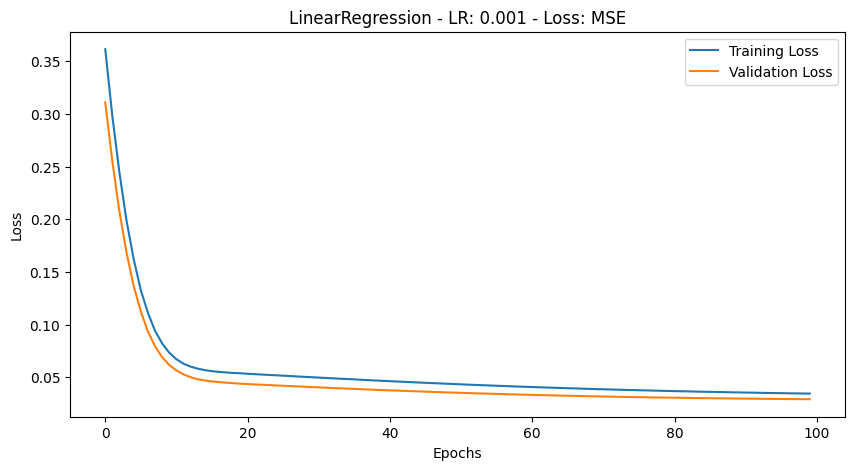

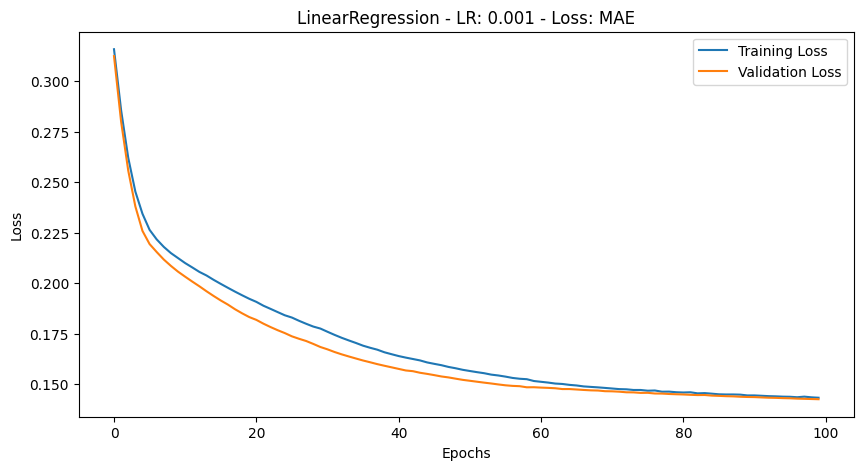

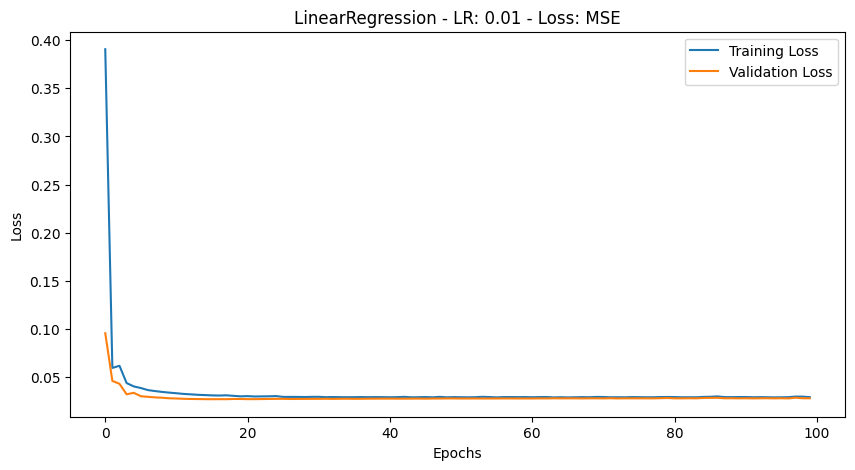

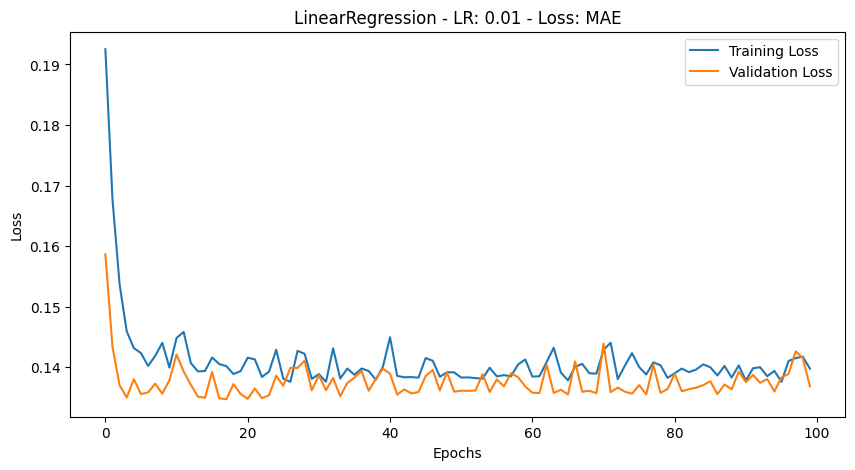

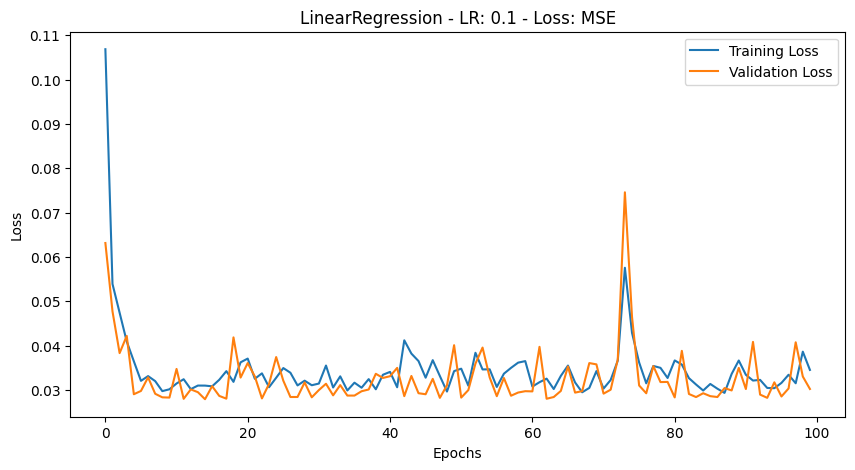

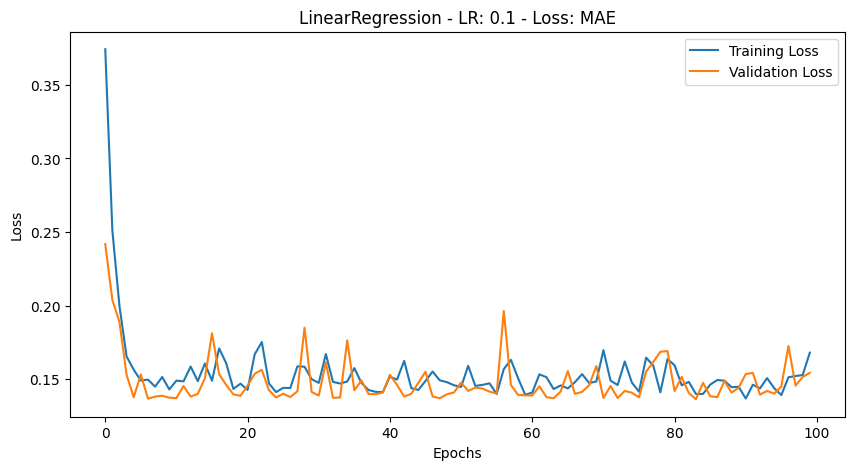

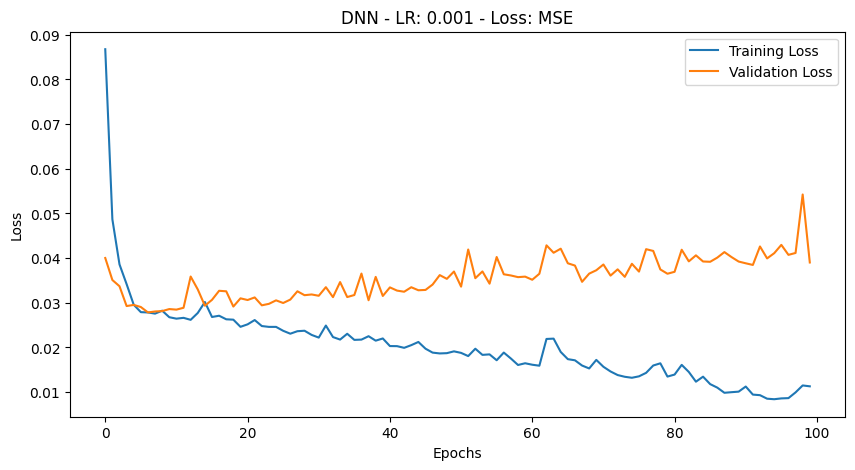

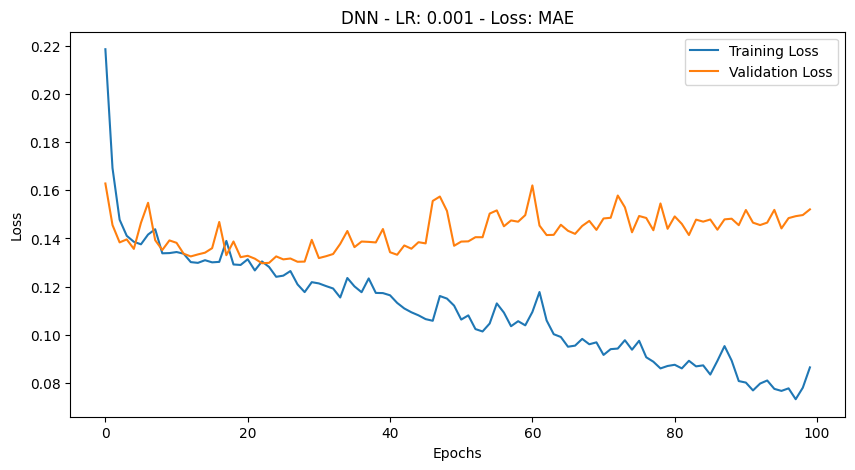

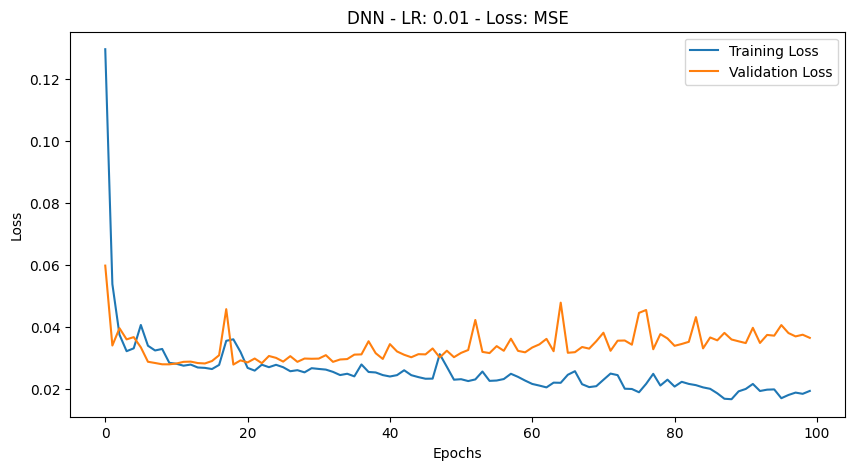

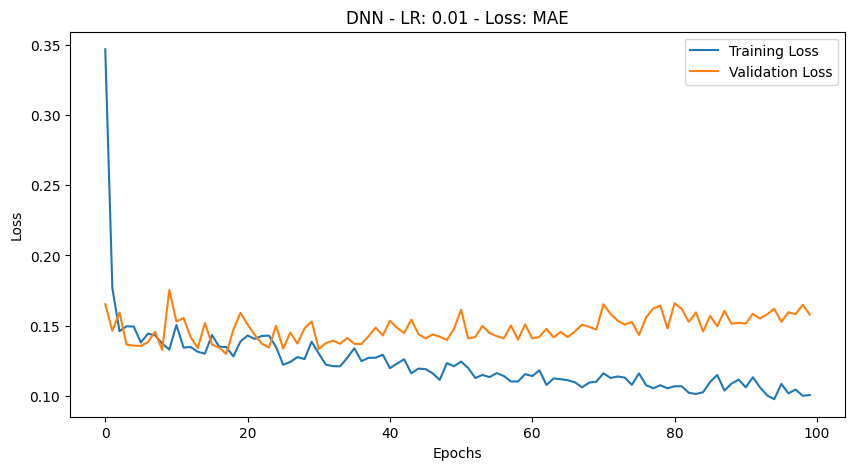

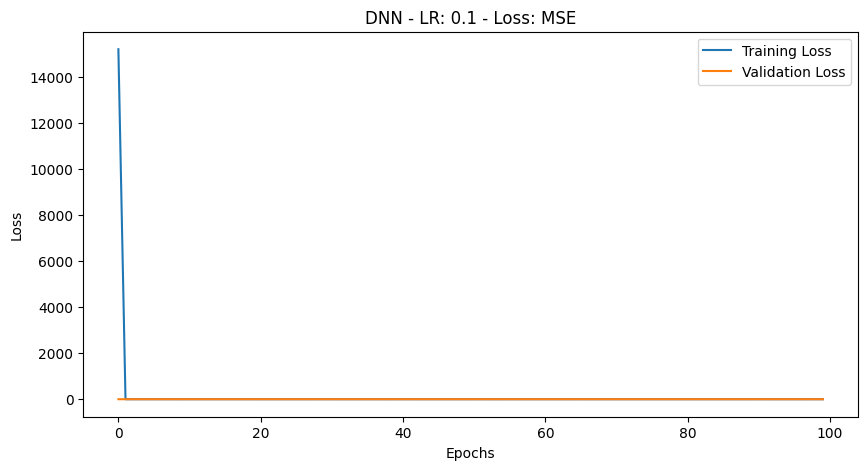

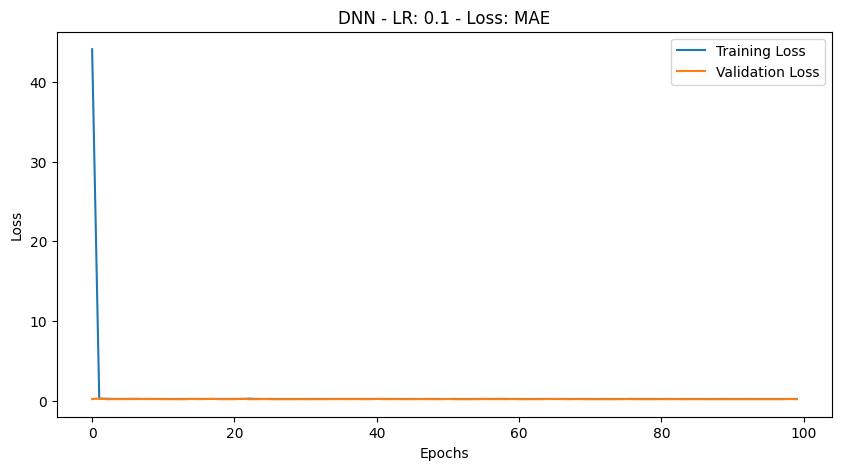

The best model is MLP with learning rate: 0.1, loss function: MSE, and validation loss: 0.0280


In [ ]:
# Train and collect final validation losses for each model at each learning rate
loss_functions = {'MSE': nn.MSELoss(), 'MAE': nn.L1Loss()}
training_results = {}

for loss_name, loss_function in loss_functions.items():
    for model_class, model_name in zip(model_classes, model_names):
        for lr in learning_rates:
            writer = SummaryWriter(comment=f'_{model_name}_{loss_name}_{lr}')
            print(f"Training {model_name} with {loss_name} loss and learning rate: {lr}")
            model = model_class(input_dim=X_train.shape[1]).to(device)
            optimizer = torch.optim.Adam(model.parameters(), lr=lr)

            training_losses, validation_losses = train_model(model, optimizer, loss_function, train_loader, val_loader, 100, writer)

            if model_name not in training_results:
                training_results[model_name] = {}
            if lr not in training_results[model_name]:
                training_results[model_name][lr] = {}
            training_results[model_name][lr][loss_name] = {
                'train_loss': training_losses,
                'val_loss': validation_losses
            }

            writer.close()

def plot_losses(training_results, model_names, learning_rates, loss_functions):
    for model_name in model_names:
        for lr in learning_rates:
            for loss_name in loss_functions.keys():
                plt.figure(figsize=(10, 5))
                data = training_results[model_name][lr][loss_name]
                plt.plot(data['train_loss'], label='Training Loss')
                plt.plot(data['val_loss'], label='Validation Loss')
                plt.title(f'{model_name} - LR: {lr} - Loss: {loss_name}')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.show()

# Call plot_losses after the training loop
plot_losses(training_results, model_names, learning_rates, loss_functions)



best_model_name_2 = None
best_lr_2 = None
best_loss_name_2 = None
lowest_loss_2 = float('inf')

for model_name in model_names:
    for lr in learning_rates:
        for loss_name in loss_functions.keys():
            # Check if the key exists in the dictionary
            if loss_name in training_results[model_name][lr]:
                val_loss = training_results[model_name][lr][loss_name]['val_loss'][-1]
                if val_loss < lowest_loss_2:
                    lowest_loss_2 = val_loss
                    best_model_name_2 = model_name
                    best_lr_2 = lr
                    best_loss_name_2 = loss_name

print(f"The best model is {best_model_name_2} with learning rate: {best_lr_2}, loss function: {best_loss_name_2}, and validation loss: {lowest_loss_2:.4f}")

# using RMSprop Optimizer


Training MLP with MSE loss and learning rate: 0.001
Epoch 1/100, Training Loss: 0.0668, Validation Loss: 0.0333
Epoch 2/100, Training Loss: 0.0376, Validation Loss: 0.0278
Epoch 3/100, Training Loss: 0.0354, Validation Loss: 0.0286
Epoch 4/100, Training Loss: 0.0340, Validation Loss: 0.0285
Epoch 5/100, Training Loss: 0.0316, Validation Loss: 0.0277
Epoch 6/100, Training Loss: 0.0288, Validation Loss: 0.0288
Epoch 7/100, Training Loss: 0.0318, Validation Loss: 0.0276
Epoch 8/100, Training Loss: 0.0294, Validation Loss: 0.0281
Epoch 9/100, Training Loss: 0.0281, Validation Loss: 0.0342
Epoch 10/100, Training Loss: 0.0293, Validation Loss: 0.0275
Epoch 11/100, Training Loss: 0.0285, Validation Loss: 0.0278
Epoch 12/100, Training Loss: 0.0273, Validation Loss: 0.0276
Epoch 13/100, Training Loss: 0.0281, Validation Loss: 0.0276
Epoch 14/100, Training Loss: 0.0274, Validation Loss: 0.0279
Epoch 15/100, Training Loss: 0.0281, Validation Loss: 0.0401
Epoch 16/100, Training Loss: 0.0292, Valid

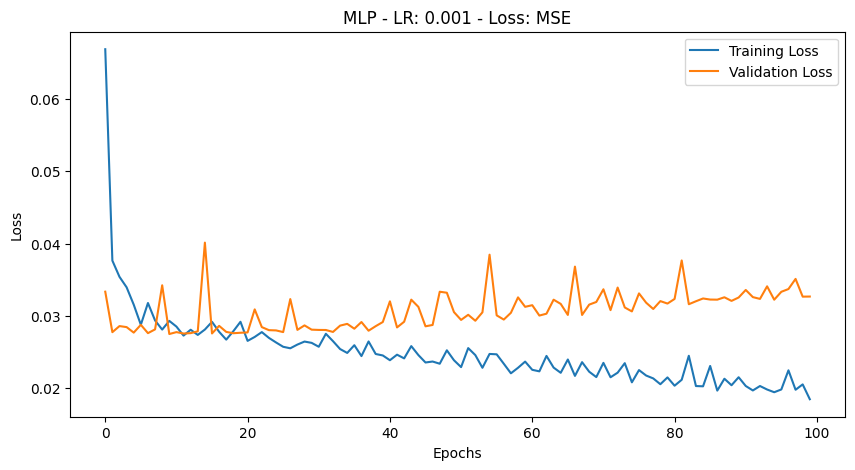

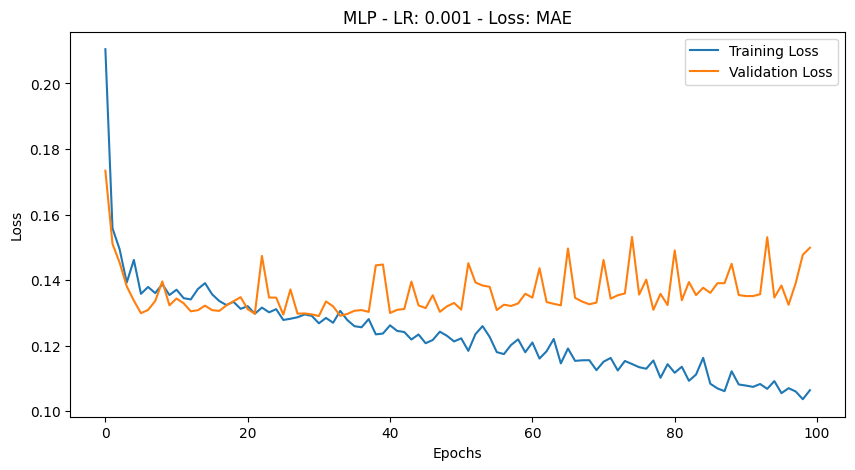

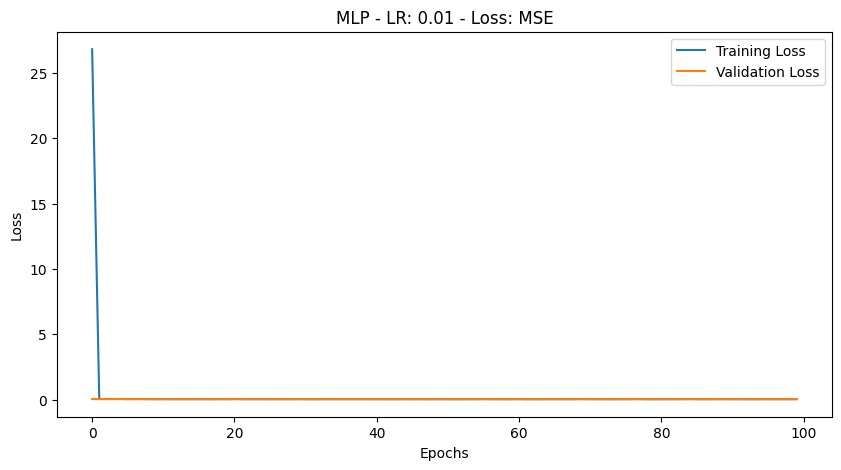

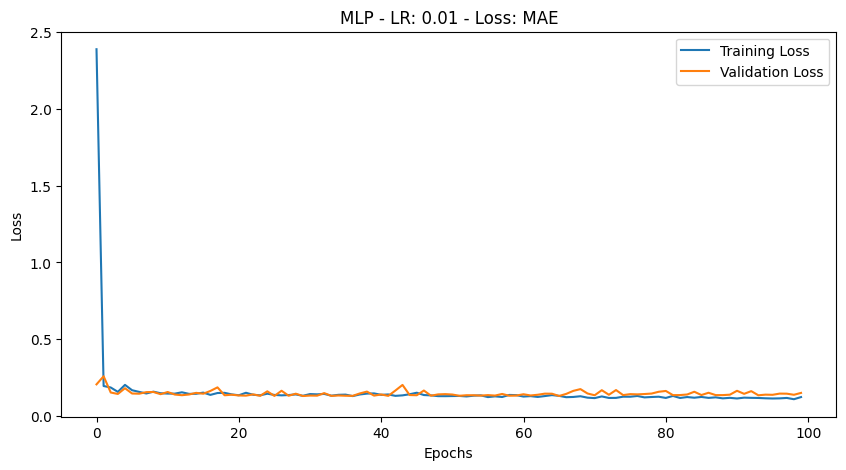

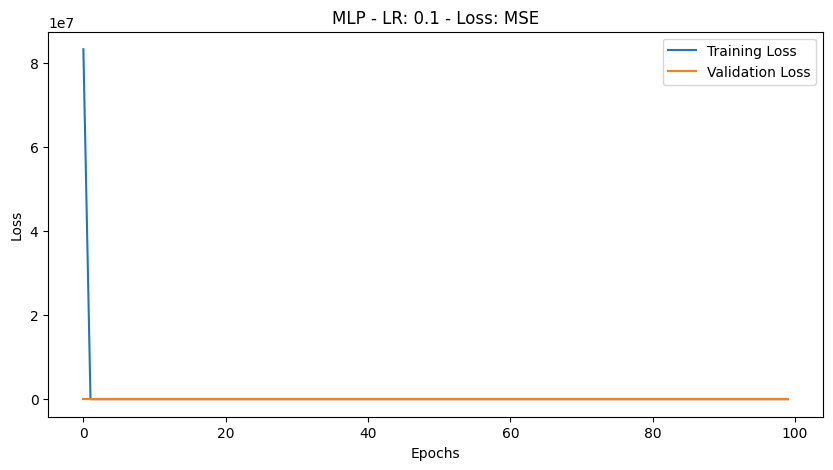

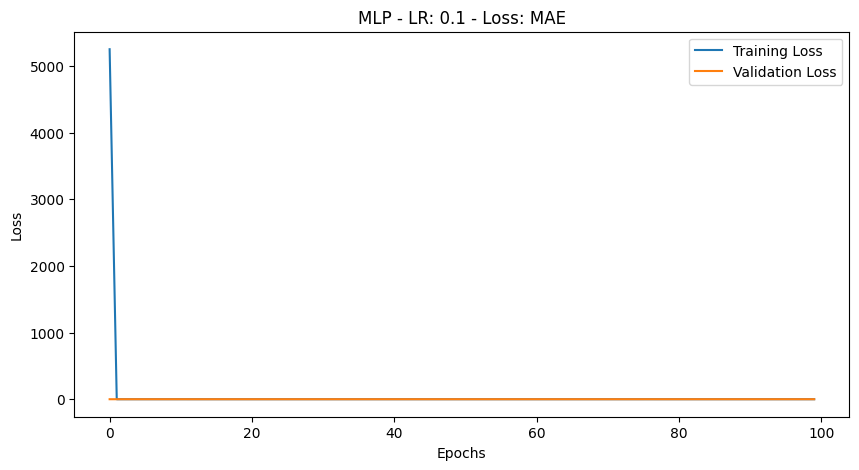

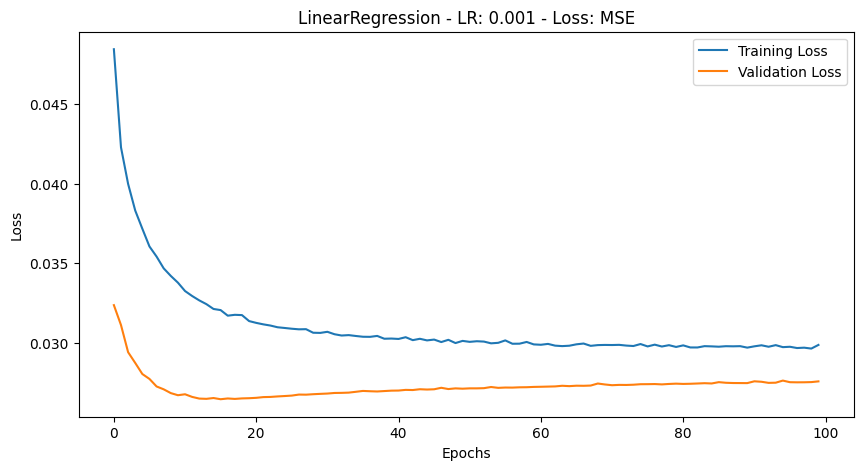

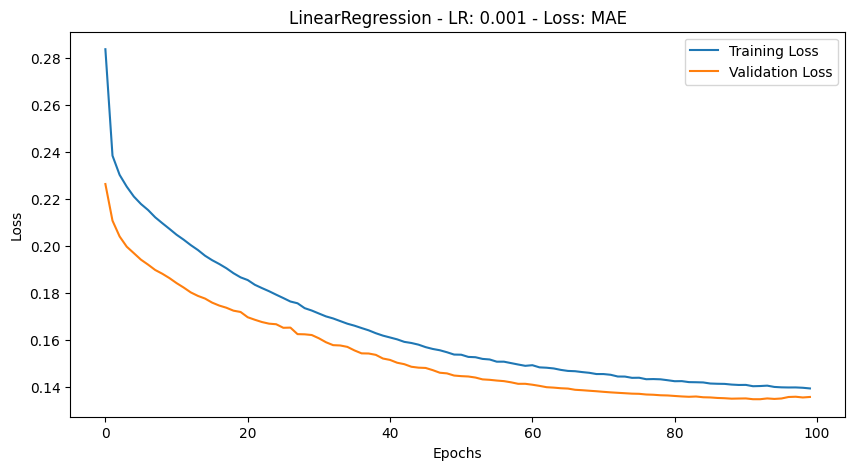

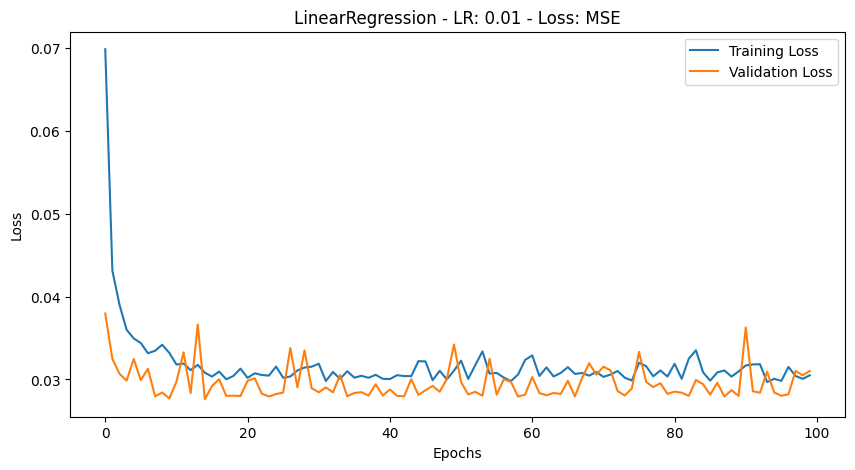

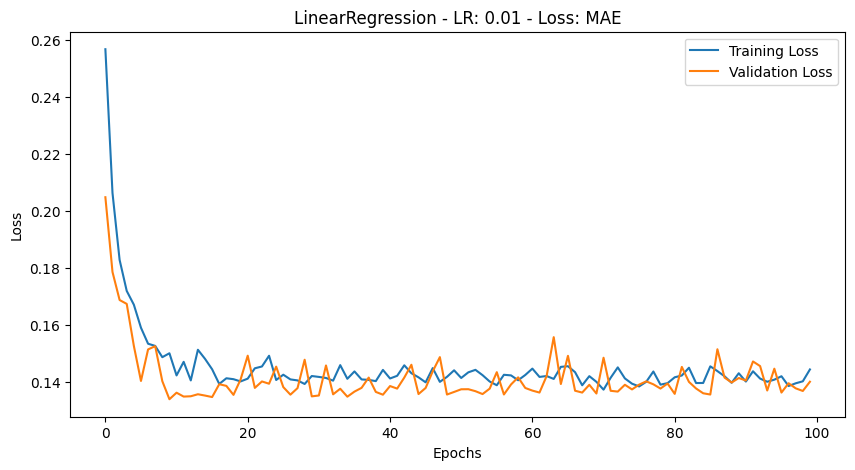

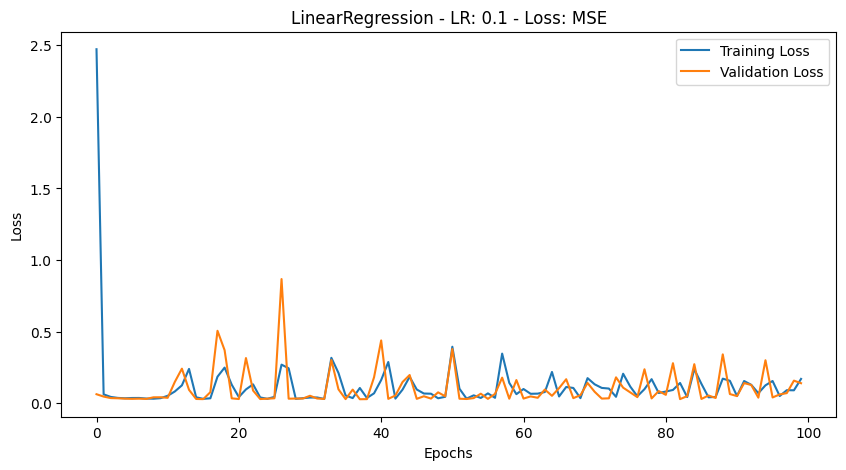

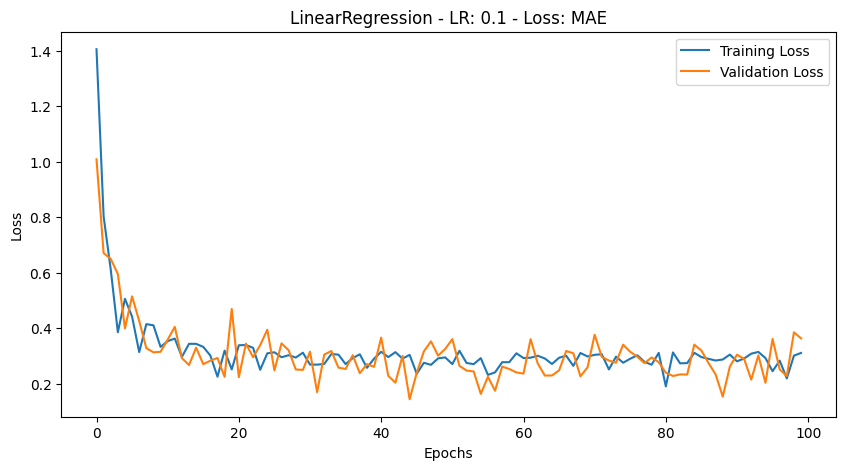

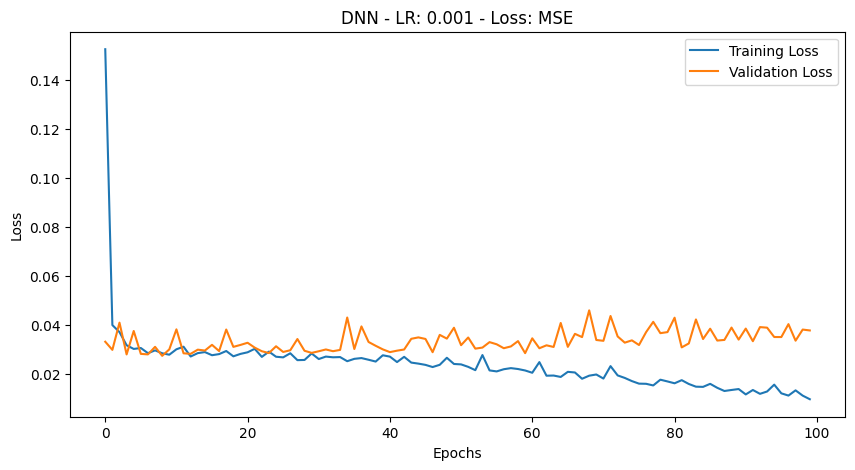

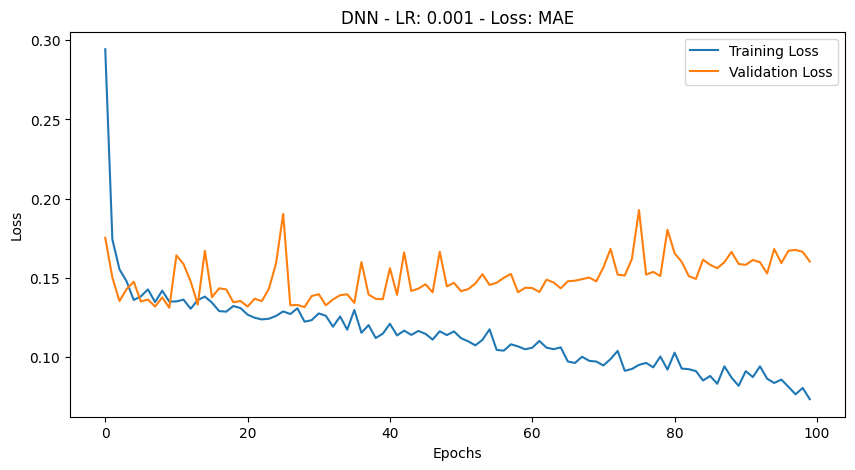

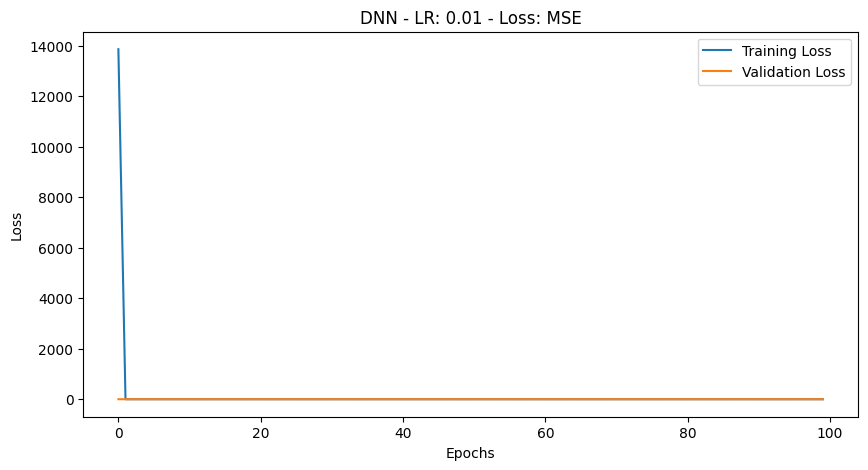

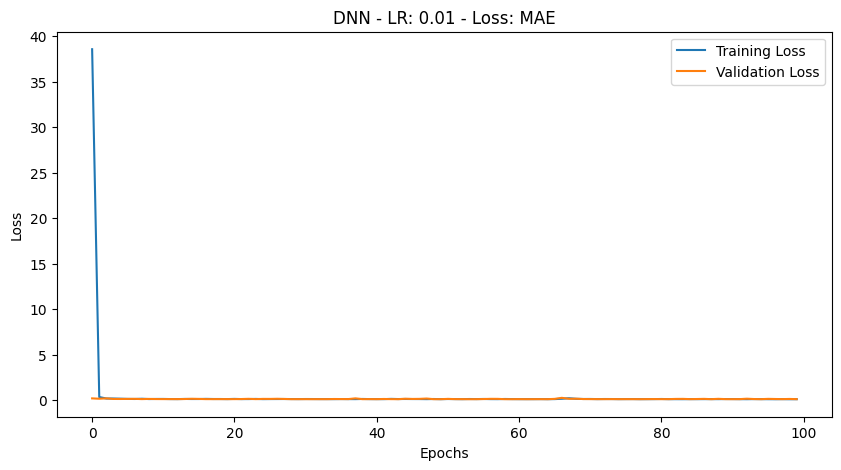

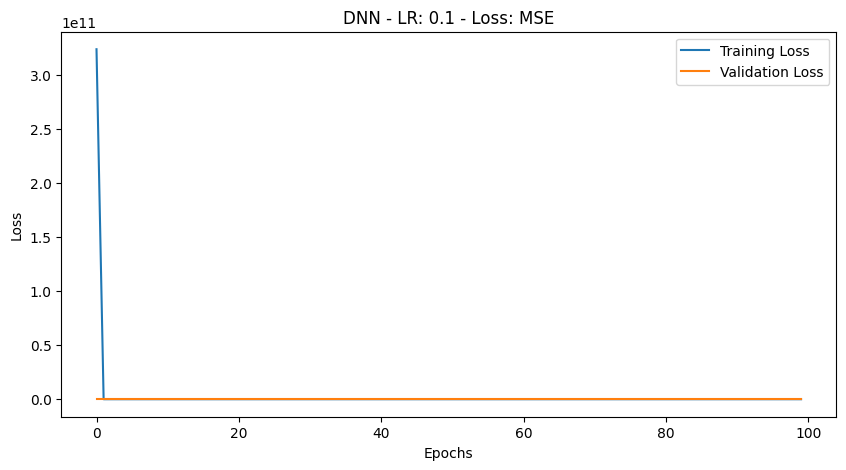

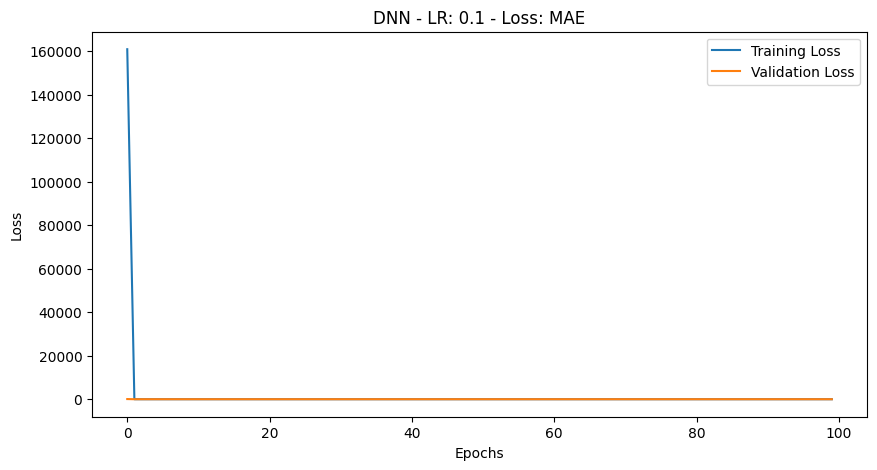

The best model is LinearRegression with learning rate: 0.001, loss function: MSE, and validation loss: 0.0276


In [ ]:
# Train and collect final validation losses for each model at each learning rate
loss_functions = {'MSE': nn.MSELoss(), 'MAE': nn.L1Loss()}
training_results = {}

for loss_name, loss_function in loss_functions.items():
    for model_class, model_name in zip(model_classes, model_names):
        for lr in learning_rates:
            writer = SummaryWriter(comment=f'_{model_name}_{loss_name}_{lr}')
            print(f"Training {model_name} with {loss_name} loss and learning rate: {lr}")
            model = model_class(input_dim=X_train.shape[1]).to(device)
            optimizer = torch.optim.RMSprop(model.parameters(), lr=lr)

            training_losses, validation_losses = train_model(model, optimizer, loss_function, train_loader, val_loader, 100, writer)

            if model_name not in training_results:
                training_results[model_name] = {}
            if lr not in training_results[model_name]:
                training_results[model_name][lr] = {}
            training_results[model_name][lr][loss_name] = {
                'train_loss': training_losses,
                'val_loss': validation_losses
            }

            writer.close()

def plot_losses(training_results, model_names, learning_rates, loss_functions):
    for model_name in model_names:
        for lr in learning_rates:
            for loss_name in loss_functions.keys():
                plt.figure(figsize=(10, 5))
                data = training_results[model_name][lr][loss_name]
                plt.plot(data['train_loss'], label='Training Loss')
                plt.plot(data['val_loss'], label='Validation Loss')
                plt.title(f'{model_name} - LR: {lr} - Loss: {loss_name}')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.show()

# Call plot_losses after the training loop
plot_losses(training_results, model_names, learning_rates, loss_functions)



best_model_name_3 = None
best_lr_3 = None
best_loss_name_3 = None
lowest_loss_3 = float('inf')

for model_name in model_names:
    for lr in learning_rates:
        for loss_name in loss_functions.keys():
            # Check if the key exists in the dictionary
            if loss_name in training_results[model_name][lr]:
                val_loss = training_results[model_name][lr][loss_name]['val_loss'][-1]
                if val_loss < lowest_loss_3:
                    lowest_loss_3 = val_loss
                    best_model_name_3 = model_name
                    best_lr_3 = lr
                    best_loss_name_3 = loss_name

print(f"The best model is {best_model_name_3} with learning rate: {best_lr_3}, loss function: {best_loss_name_3}, and validation loss: {lowest_loss_3:.4f}")

In [ ]:
# Instantiate the best model

final_best_loss_name = min(best_loss_name,best_loss_name_2,best_loss_name_3)
final_lowest_loss = max(lowest_loss,lowest_loss_2,lowest_loss_3)

print(final_lowest_loss,final_best_loss_name)




0.02804796653258246 MSE
